First, I import all of the necessary libraries in order to perform analytic operations on the housing data I am using for this assignment

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

Next, I use the pandas function pd.read_csv in order to read the comma-separated values dataset "House_Rent_Dataset.csv"

In [18]:
HRData = pd.read_csv("House_Rent_Dataset.csv")

Then the .info() function in order to review the data at a high level. This also helps with the rest of the formulas in order to see all available columns in one place

In [19]:
HRData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 4746 non-null   int64 
 1   Posted On          4746 non-null   object
 2   BHK                4746 non-null   int64 
 3   Rent               4746 non-null   int64 
 4   Size               4746 non-null   int64 
 5   Floor              4746 non-null   object
 6   Area Type          4746 non-null   object
 7   Area Locality      4746 non-null   object
 8   City               4746 non-null   object
 9   Furnishing Status  4746 non-null   object
 10  Tenant Preferred   4746 non-null   object
 11  Bathroom           4746 non-null   int64 
 12  Point of Contact   4746 non-null   object
dtypes: int64(5), object(8)
memory usage: 482.1+ KB


I start my analysis by looking at the data broken down by City. We get a count of records as well as the percentage of data points from each city that make up the whole set. Then I graph the average rental rate in each city to give me an idea and visual into where the different classes of neighborhoods are in India. 

In [20]:
HRData.groupby(['City'])['id'].count()

City
Bangalore    886
Chennai      891
Delhi        605
Hyderabad    868
Kolkata      524
Mumbai       972
Name: id, dtype: int64

In [21]:
HRData['City'].value_counts(normalize=True)

Mumbai       0.204804
Chennai      0.187737
Bangalore    0.186684
Hyderabad    0.182891
Delhi        0.127476
Kolkata      0.110409
Name: City, dtype: float64

Text(0.5, 1.0, 'Average Rental Rate by City')

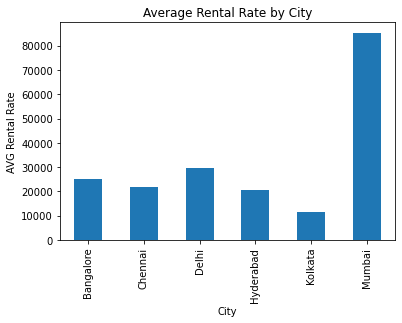

In [22]:
HRData.groupby(['City'])['Rent'].mean().plot(kind="bar")
plt.xlabel("City")
plt.ylabel("AVG Rental Rate")
plt.title('Average Rental Rate by City', size=12)

I perform the same 3 functions as above on the Tenant Preferred column in order to understand more about the demographic of individuals in the dataset. This tells us who the owners are looking for when leasing their properties as well as who is making up the majority of the rental market in India.

In [23]:
HRData.groupby(['Tenant Preferred'])['id'].count()

Tenant Preferred
Bachelors            830
Bachelors/Family    3444
Family               472
Name: id, dtype: int64

In [24]:
HRData['Tenant Preferred'].value_counts(normalize=True)

Bachelors/Family    0.725664
Bachelors           0.174884
Family              0.099452
Name: Tenant Preferred, dtype: float64

Text(0.5, 1.0, 'Average Rental Rate by Tenant Type')

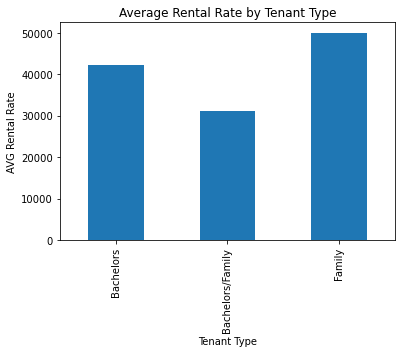

In [25]:
HRData.groupby(['Tenant Preferred'])['Rent'].mean().plot(kind="bar")
plt.xlabel("Tenant Type")
plt.ylabel("AVG Rental Rate")
plt.title('Average Rental Rate by Tenant Type', size=12)

Next we run a compairison of rental rates vs. size of the units. This gives us a great macro visual of the data in order to identify where the majorit of the rental properties fall. We see a large group of data ranging up to 3000 sq. ft.

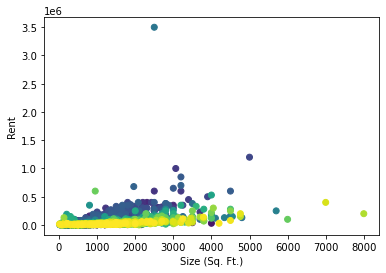

In [26]:
fig, ax = plt.subplots()
ax.scatter(HRData['Size'], HRData['Rent'], c=HRData.index)
ax.set_xlabel('Size (Sq. Ft.)')
ax.set_ylabel('Rent')
plt.show()

The next step is to run a regression model on a One-Hot Encoded format of the House_Rent_Dataset. We once again use the pandas function pd.read_csv to pull in the dataset and .info() in order to get the information we will need to input in the regression formula. I classify the dependent variable as Rent and all other encoded values as the independent variables in the formula. I use statsmodel.api in order to output the regression model into a readable format. 

In [27]:
HROneHotData = pd.read_csv("House_Rent_Dataset - One_Hot_Encoded.csv")

In [28]:
HROneHotData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   BHK               4746 non-null   int64
 1   Rent              4746 non-null   int64
 2   Size              4746 non-null   int64
 3   Floor Level       4746 non-null   int64
 4   Building Levels   4746 non-null   int64
 5   Delhi             4746 non-null   int64
 6   Mumbai            4746 non-null   int64
 7   Bangalore         4746 non-null   int64
 8   Hyderabad         4746 non-null   int64
 9   Chennai           4746 non-null   int64
 10  Kolkata           4746 non-null   int64
 11  Unfurnished       4746 non-null   int64
 12  Semi-Furnished    4746 non-null   int64
 13  Furnished         4746 non-null   int64
 14  Bachelors/Family  4746 non-null   int64
 15  Family            4746 non-null   int64
 16  Bachelors         4746 non-null   int64
 17  Bathroom          4746 non-null  

I run a regression model on all of the independent variables in the One-Hot dataset in order to evaluate all of the variables in the equation. 

In [29]:
dependent_var = HROneHotData[['Rent']]
independent_vars = HROneHotData[['BHK', 'Size', 'Floor Level', 'Building Levels', 'Delhi', 'Mumbai', 'Bangalore', 'Hyderabad', 'Chennai', 'Kolkata', 'Unfurnished', 'Semi-Furnished', 'Furnished', 'Bachelors/Family', 'Family', 'Bachelors', 'Bathroom']]
independent_vars_c = sm.add_constant(independent_vars)
regression_model = sm.OLS(dependent_var, independent_vars_c).fit()
output = regression_model.summary()
print(output)

                            OLS Regression Results                            
Dep. Variable:                   Rent   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     159.7
Date:                Fri, 02 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:00:51   Log-Likelihood:                -59283.
No. Observations:                4746   AIC:                         1.186e+05
Df Residuals:                    4731   BIC:                         1.187e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.883e+04   1636.022  

I am left with 12 independent variables with statistical significance (p-value) of less than 0.05. 4 of these variables have a positive correlation and the remaining 8 have a negative correlation to rental rates in India.

In [30]:
dependent_var = HROneHotData[['Rent']]
independent_vars = HROneHotData[['Size', 'Floor Level', 'Mumbai', 'Bangalore', 'Hyderabad', 'Chennai', 'Kolkata', 'Unfurnished', 'Semi-Furnished', 'Family', 'Bathroom']]
independent_vars_c = sm.add_constant(independent_vars)
regression_model = sm.OLS(dependent_var, independent_vars_c).fit()
output = regression_model.summary()
print(output)

                            OLS Regression Results                            
Dep. Variable:                   Rent   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     202.7
Date:                Fri, 02 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:00:51   Log-Likelihood:                -59286.
No. Observations:                4746   AIC:                         1.186e+05
Df Residuals:                    4734   BIC:                         1.187e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -1.95e+04   4143.404     -4.